In [2]:
#import panda packages
import pandas as pd

#Read Data from CSV file And Store It IN DATAFRAME
df = pd.read_csv('FB_2.csv')

#print TOP 10 RECORD
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
1,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
3,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
4,2012-05-25,32.900002,32.950001,31.110001,31.910000,31.910000,37149800
5,2012-05-29,31.480000,31.690001,28.650000,28.840000,28.840000,78063400
6,2012-05-30,28.700001,29.549999,27.860001,28.190001,28.190001,57267900
7,2012-05-31,28.549999,29.670000,26.830000,29.600000,29.600000,111639200
8,2012-06-01,28.889999,29.150000,27.389999,27.719999,27.719999,41855500
9,2012-06-04,27.200001,27.650000,26.440001,26.900000,26.900000,35230300


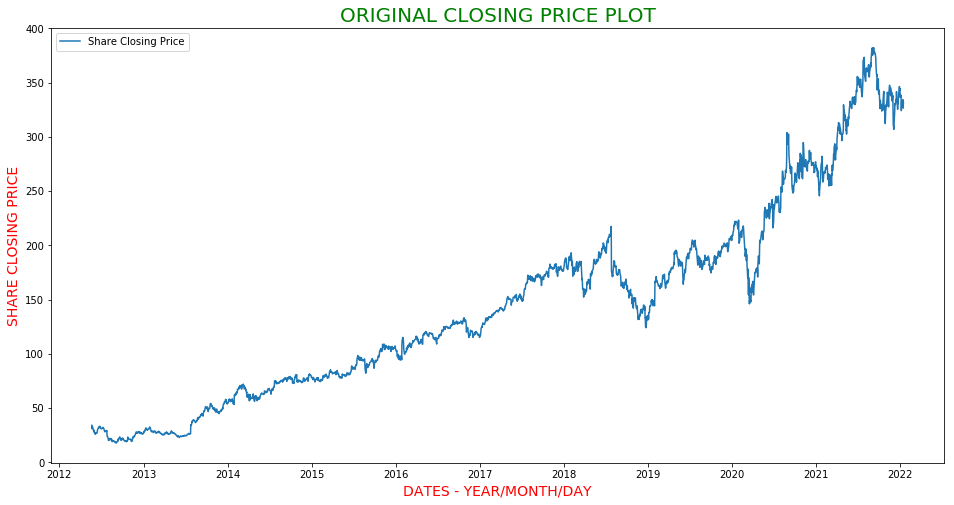

In [3]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#to plot the graph
import matplotlib.pyplot as plt
%matplotlib inline

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Share Closing Price')
plt.title('ORIGINAL CLOSING PRICE PLOT', fontsize=20, color='g')
plt.xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
plt.ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
plt.legend()

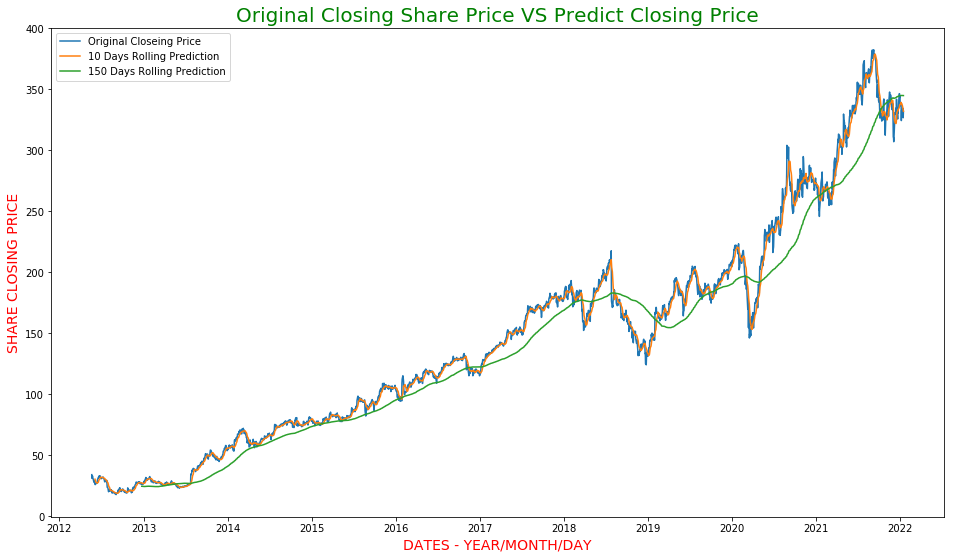

In [4]:
# Get the STOCK CLOSE PRICE timeseries. This now returns a Pandas Series object indexed by date.
stockcloseingprice = df.loc[:, 'Close']

# Calculate the 10 and 150 days moving averages of the closing prices
short_rolling = stockcloseingprice.rolling(window=10).mean()
long_rolling = stockcloseingprice.rolling(window=150).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(stockcloseingprice.index, stockcloseingprice, label='Original Closeing Price')
ax.plot(short_rolling.index, short_rolling, label='10 Days Rolling Prediction')
ax.plot(long_rolling.index, long_rolling, label='150 Days Rolling Prediction')

ax.set_xlabel('DATES - YEAR/MONTH/DAY',fontsize=14, color='r')
ax.set_ylabel('SHARE CLOSING PRICE',fontsize=14, color='r')
ax.set_title('Original Closing Share Price VS Predict Closing Price', fontsize=20, color='g')
ax.legend()

In [5]:
#calculate rmse
#MSE (Mean Squared Error) = np.mean((y_test - y_predtest)**2)
#RMSE (Root Mean Squared Error) = np.sqrt(MSE)

import numpy as np

x = np.power((np.array(df['Close'])-short_rolling),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
print ('SHORT TIME SERIES ROLLING ', rmse)

x = np.power((np.array(df['Close'])-long_rolling),2)
mse = np.mean(x)
rmse = np.sqrt(mse)
print ('LONG TIME SERIES ROLLING ', rmse)

SHORT TIME SERIES ROLLING  5.2874683890344265
LONG TIME SERIES ROLLING  20.154018618633522
